<a href="https://colab.research.google.com/github/akshatagg06/Tweepy-scrapping/blob/main/tweepy_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# Description : This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

#Import The Libraries and Packages
Next, import some of the libraries that’ll be used within this program.

In [27]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import twitter_creds
plt.style.use('fivethirtyeight')

Now, it’s time to create the authentication object. Set the access token and access token secret, and authenticate to Twitter.

In [29]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(twitter_creds.consumerKey, twitter_creds.consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(twitter_creds.accessToken, twitter_creds.accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

#Extract and Analyze the Data
It’s time to extract the tweets of a Twitter user. First, I’ll get the last 100 posts for the Twitter user Bill Gates and show only the five most recent tweets.

In [30]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="BillGates", count = 100, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) I’m a big fan of author @harari_yuval and was excited to talk to him about why humanity is so willing to believe falsehoods and what these lies tell us about ourselves—both as individuals and as a society. https://t.co/yREVfCds3v

2) RT @GlobalFund: “I will continue fighting. I will continue supporting other patients. I will never give up.”

Meet Aftab, a multi-drug resi…

3) Today is the 25th anniversary of my first book, The Road Ahead. I made a lot of predictions about technology in the book, and it was fun to look back and see what I got right (and what I got wrong). https://t.co/Kr9YUojfl9

4) This week, Rashida and I ask a big question that has never felt more urgent: is inequality inevitable? We spoke with Compton mayor @AjaLBrown and @OppInsights director Raj Chetty about what it’ll take to build a more equal society. https://t.co/7NiSAYsouy

5) RT @gavi: How can the fight to #endpolio help inform the  #COVID19 response? The @unfoundation’s Elizabe

Create a DataFrame with a column called Tweets that’ll contain the posts from the Twitter user, and then show the first five rows.

In [31]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,I’m a big fan of author @harari_yuval and was ...
1,RT @GlobalFund: “I will continue fighting. I w...
2,Today is the 25th anniversary of my first book...
3,"This week, Rashida and I ask a big question th..."
4,RT @gavi: How can the fight to #endpolio help ...


The data is a little dirty because it contains the @ symbol, hyperlinks, RTs, and may contain hash tags, so I’ll clean it up by creating a function to remove these symbols from the tweets. Then, I’ll apply that function to the tweets and show the results.

In [32]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,I’m a big fan of author _yuval and was excited...
1,: “I will continue fighting. I will continue s...
2,Today is the 25th anniversary of my first book...
3,"This week, Rashida and I ask a big question th..."
4,: How can the fight to endpolio help inform th...
...,...
95,_org: It's time to end the silence about our h...
96,: Proud to share my thoughts in ’s “injustice ...
97,"_Nyongo: 1. This is Opal Lee, the force behind..."
98,I am committed to listening and learning more ...


I want to add the tweets’ subjectivity and polarity to the DataFrame. In order to do this, I’ll create two functions: one to get the tweets called Subjectivity (how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion) and the other to get the tweets called Polarity (how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score).
Next I’ll store the results into two columns — one called Subjectivity and the other called Polarity — and show the results.

In [33]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,I’m a big fan of author _yuval and was excited...,0.533333,0.208333
1,: “I will continue fighting. I will continue s...,0.312500,0.062500
2,Today is the 25th anniversary of my first book...,0.393810,0.067143
3,"This week, Rashida and I ask a big question th...",0.470000,0.200000
4,: How can the fight to endpolio help inform th...,0.000000,0.000000
...,...,...,...
95,_org: It's time to end the silence about our h...,0.000000,0.000000
96,: Proud to share my thoughts in ’s “injustice ...,0.800000,0.533333
97,"_Nyongo: 1. This is Opal Lee, the force behind...",0.700000,-0.400000
98,I am committed to listening and learning more ...,0.361667,0.166667


Let’s see how well the sentiments are distributed. A good way to accomplish this task is by understanding the common words by plotting word clouds.
A word cloud (also known as text clouds or tag clouds) is a visualization, the more a specific word appears in the text, the bigger and bolder it appears in the word cloud.

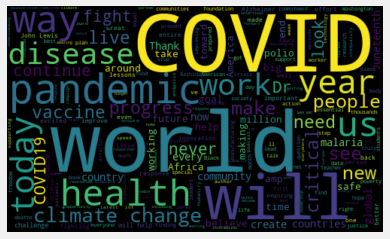

In [34]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Create a function to compute the negative (-1), neutral (0), and positive (+1) analysis, and add the information to a new column called Analysis. Then, show the results.

In [37]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,I’m a big fan of author _yuval and was excited...,0.533333,0.208333,Positive
1,: “I will continue fighting. I will continue s...,0.312500,0.062500,Positive
2,Today is the 25th anniversary of my first book...,0.393810,0.067143,Positive
3,"This week, Rashida and I ask a big question th...",0.470000,0.200000,Positive
4,: How can the fight to endpolio help inform th...,0.000000,0.000000,Neutral
...,...,...,...,...
95,_org: It's time to end the silence about our h...,0.000000,0.000000,Neutral
96,: Proud to share my thoughts in ’s “injustice ...,0.800000,0.533333,Positive
97,"_Nyongo: 1. This is Opal Lee, the force behind...",0.700000,-0.400000,Negative
98,I am committed to listening and learning more ...,0.361667,0.166667,Positive


Print the positive tweets in ascending order. The most positive tweet is the #1 tweet.

In [38]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) I’m a big fan of author _yuval and was excited to talk to him about why humanity is so willing to believe falsehoods and what these lies tell us about ourselves—both as individuals and as a society. 

2) : “I will continue fighting. I will continue supporting other patients. I will never give up.”

Meet Aftab, a multi-drug resi…

3) Today is the 25th anniversary of my first book, The Road Ahead. I made a lot of predictions about technology in the book, and it was fun to look back and see what I got right (and what I got wrong). 

4) This week, Rashida and I ask a big question that has never felt more urgent: is inequality inevitable? We spoke with Compton mayor  and  director Raj Chetty about what it’ll take to build a more equal society. 

5) You can listen to a bonus clip that didn’t make it into our latest episode here:  

6) : Full interview with : 

7) In our first podcast episode, Rashida Jones and I talked to Dr. Anthony Fauci about what to expect i

Print the negative tweets in descending order. The most negative tweet is the #1 tweet.

In [39]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Nearly forty million people have Alzheimer’s or dementia today. We have no way to stop or even slow the disease at this point, but I’m hopeful the new Alzheimer’s Disease Data Initiative () will speed up progress. 

2) 30: Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

3) : What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

4) To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to decarbonize sectors—to get us on a viable path to net-zero emissions. 

5) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: 

6) : Three lessons that have been central to the COVID19 respon

Plot the polarity and subjectivity as a scatter plot.

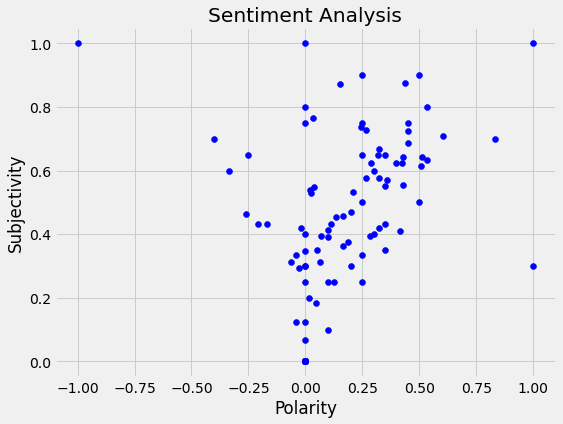

In [40]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

Print the percentage of positive tweets. 

In [41]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

64.0

Print the percentage of negative tweets. 

In [42]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

12.0

Show the value counts. Now we can see 64 tweets are positive, 24 are neutral, and 12 are negative.

In [44]:
# Show the value counts
df['Analysis'].value_counts()

Positive    64
Neutral     24
Negative    12
Name: Analysis, dtype: int64

And visually.....

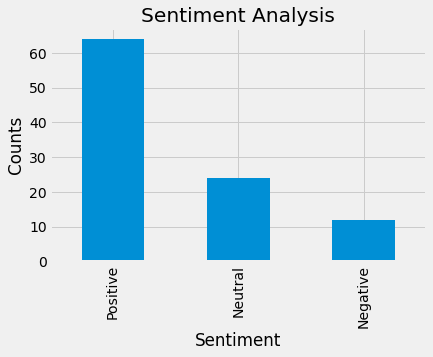

In [45]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()